In [7]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

sns.set_context('talk')

# Probability mass function

When tossing a fair coin, the chance of getting a head or a tail is both 50%.

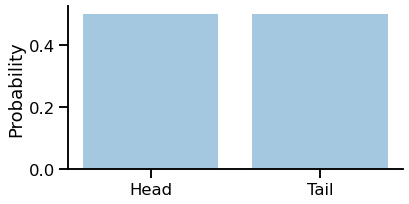

In [3]:
coin = sns.distributions.stats.bernoulli(.5)

x = ["Head", "Tail"]

plt.bar(x, coin.pmf(k=[0, 1]), alpha=.4) #pmf probability mass function
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.ylabel('Probability');
plt.gcf().set_size_inches(6., 3)


#plt.savefig('../img/2_PMF.svg', bbox_inches='tight', pad_inches=.1)

In [5]:
#plt.bar(x, st.bernoulli(p=.1))

# Example of PDF, CDF and inverse CDF

Different theoretical distributions may be accessed via `seaborn.distributions.stats` which are the identical distributions as in `scipy.stats`. The different functions, i.e. PDF, CDF and inverse CDF wich is called *percent point function* (PPF), are methods of the respective distribution class or instance. To learn how to use the different functions, run the lines below to get the documentation. 

In [5]:
sns.distributions.stats.norm.pdf?

Object `sns.distributions.stats.norm.pdf` not found.


In [5]:
sns.distributions.stats.norm.cdf?

Signature: sns.distributions.stats.norm.cdf(x, *args, **kwds)
Docstring:
Cumulative distribution function of the given RV.

Parameters
----------
x : array_like
    quantiles
arg1, arg2, arg3,... : array_like
    The shape parameter(s) for the distribution (see docstring of the
    instance object for more information)
loc : array_like, optional
    location parameter (default=0)
scale : array_like, optional
    scale parameter (default=1)

Returns
-------
cdf : ndarray
    Cumulative distribution function evaluated at `x`
File:      /opt/tljh/user/envs/climDat/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py
Type:      method


In [6]:
sns.distributions.stats.norm.ppf?

Signature: sns.distributions.stats.norm.ppf(q, *args, **kwds)
Docstring:
Percent point function (inverse of `cdf`) at q of the given RV.

Parameters
----------
q : array_like
    lower tail probability
arg1, arg2, arg3,... : array_like
    The shape parameter(s) for the distribution (see docstring of the
    instance object for more information)
loc : array_like, optional
    location parameter (default=0)
scale : array_like, optional
    scale parameter (default=1)

Returns
-------
x : array_like
    quantile corresponding to the lower tail probability q.
File:      /opt/tljh/user/envs/climDat/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py
Type:      method


## The PDF

The *probability density function* **PDF** is defined as

$$ f(x) = \lim_{a \to b}\frac{P(a < x < b)}{b - a}$$

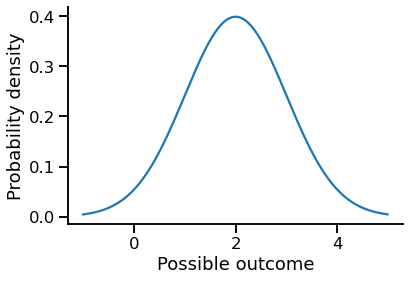

In [7]:
x = np.arange(-1., 5., 0.01)
norm_dis = sns.distributions.stats.norm(loc=2., scale=1.)

plt.plot(x, norm_dis.pdf(x));
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.ylabel("Probability density");
plt.xlabel("Possible outcome");

#plt.savefig('../img/2_PDF_simple.svg', bbox_inches='tight', pad_inches=.1)

The area under the *probability density function* **PDF** between two values corresponds to the probability of a random variable to lie between the two values.

$$ P(a < x < b) = \int_{a}^{b} f(x)dx $$

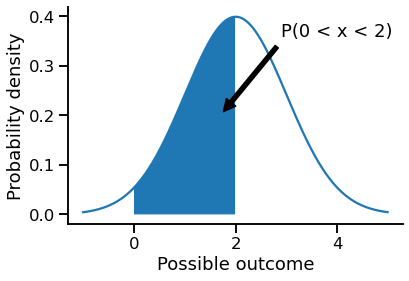

In [7]:
x = np.arange(-1., 5., 0.01)
norm_dis = sns.distributions.stats.norm(loc=2., scale=1.)

plt.plot(x, norm_dis.pdf(x));
plt.fill_between(y1=norm_dis.pdf(x[(x > 0) & (x < 2)]), x=x[(x > 0) & (x < 2)])
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.ylabel("Probability density");
plt.xlabel("Possible outcome");

ax.annotate(
    'P(0 < x < 2)', xy=(1.7, 0.2), xytext=(4, .35),
    arrowprops=dict(facecolor='black', shrink=0.05),
    horizontalalignment='center', va='bottom'
);

#plt.savefig('../img/2_PDF.svg', bbox_inches='tight', pad_inches=.1)

## The CDF

The *comulative distribution function* **CDF** is the indefinite integral of the PDF, i.e.

$$ F(x) = \int_{-\infty}^{x} f(x') dx' $$

Hence,

$$ F(a) = P( x < a) $$

and

$$ F(b) - F(a) = P(a < x < b) $$

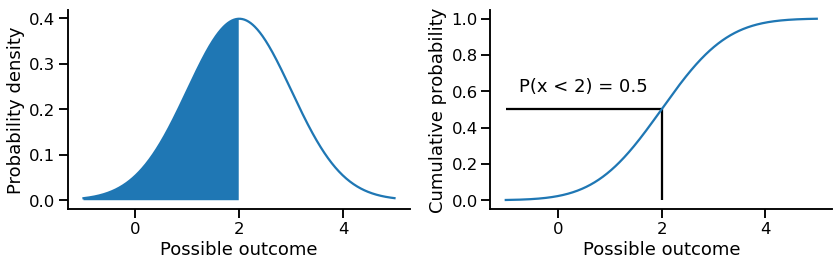

In [8]:
fig = plt.figure(figsize=(12., 4.))

plt.subplot(1, 2, 1)

plt.plot(x, norm_dis.pdf(x));
plt.fill_between(y1=norm_dis.pdf(x[(x < 2)]), x=x[(x < 2)])
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.ylabel("Probability density");
plt.xlabel("Possible outcome");

plt.subplot(1, 2, 2)

plt.plot(x, norm_dis.cdf(x));
plt.vlines(2., 0., norm_dis.cdf(2))
plt.hlines(norm_dis.cdf(2), -1., 2.)

plt.ylabel("Cumulative probability");
plt.xlabel('Possible outcome');

plt.annotate(
    'P(x < 2) = 0.5',
    xy=(0., 0.), xytext=(0.5, 0.6),
    ha='center'
)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout();
#plt.savefig('../img/2_CDF_1.svg', bbox_inches='tight', pad_inches=.1)

In [25]:
# prob of getting an event between 1 and 2
P = norm_dis.cdf(2) - norm_dis.cdf(1)

#norm_dis.ppf(.5) #half of all values are smaller
#norm_dis.ppf(.75) #25% of getting a small value
norm_dis.ppf(.025), norm_dis.ppf(1 - .025) #contains the outcome at 95% probability

(0.040036015459945506, 3.959963984540054)

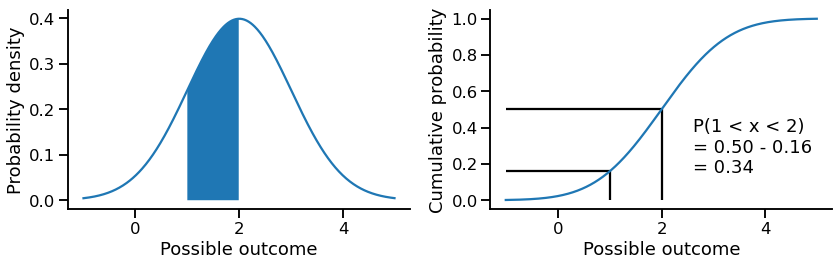

In [12]:
fig = plt.figure(figsize=(12., 4.))

plt.subplot(1, 2, 1)

plt.plot(x, norm_dis.pdf(x));
plt.fill_between(y1=norm_dis.pdf(x[(x > 1) & (x < 2)]), x=x[(x > 1) & (x < 2)])
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.ylabel("Probability density");
plt.xlabel("Possible outcome");

plt.subplot(1, 2, 2)

plt.plot(x, norm_dis.cdf(x));
plt.vlines(2., 0., norm_dis.cdf(2))
plt.hlines(norm_dis.cdf(2), -1., 2.)

plt.vlines(1., 0., norm_dis.cdf(1))
plt.hlines(norm_dis.cdf(1), -1., 1.)

plt.ylabel("Cumulative probability");
plt.xlabel('Possible outcome');

plt.annotate(
    'P(1 < x < 2)\n= {:4.2f} - {:4.2f}\n= {:4.2f}'.format(
        norm_dis.cdf(2.), norm_dis.cdf(1.),
        norm_dis.cdf(2.) - norm_dis.cdf(1.)
    ),
    xy=(0., 0.), xytext=(2.6, .15),
    ha='left'
)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout();
#plt.savefig('../img/2_CDF_2.svg', bbox_inches='tight', pad_inches=.1)

## The PPF

The *point percent function* **PPF** is the inverse of the CDF and may be used to obtain thresholds on the measured quantity, e.g. below which value are 95% of the expected outcomes or what is the interval that excludes the 5% most unlikely outcomes?

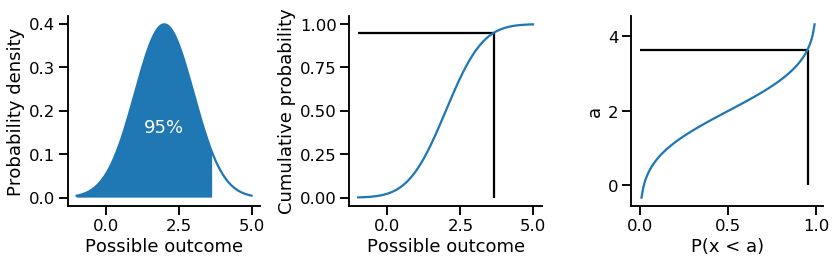

In [128]:
fig = plt.figure(figsize=(12., 4.))

x_thresh = norm_dis.ppf(.95)

plt.subplot(1, 3, 1)

plt.plot(x, norm_dis.pdf(x));
plt.fill_between(y1=norm_dis.pdf(x[x < x_thresh]), x=x[x < x_thresh])
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.ylabel("Probability density");
plt.xlabel("Possible outcome");

plt.annotate(
    '95%', xy=(0, 0), xytext=(2., 0.15), ha='center', color='w'
)

plt.subplot(1, 3, 2)

plt.plot(x, norm_dis.cdf(x));
plt.vlines(x_thresh, 0., norm_dis.cdf(x_thresh))
plt.hlines(norm_dis.cdf(x_thresh), -1., x_thresh)

plt.ylabel("Cumulative probability");
plt.xlabel('Possible outcome');

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.subplot(1, 3, 3)
plt.plot(np.arange(0., 1., .01), norm_dis.ppf(np.arange(0., 1., .01)))
plt.xlabel('P(x < a)')
plt.ylabel('a')

plt.hlines(x_thresh, 0., .95)
plt.vlines(0.95, 0, x_thresh)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout();
plt.savefig('../img/2_PPF_1.svg', bbox_inches='tight', pad_inches=.1)

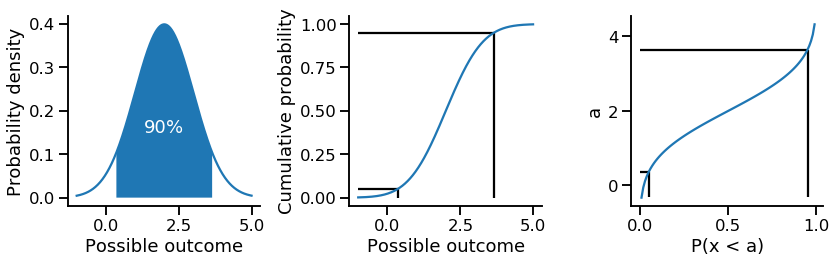

In [129]:
fig = plt.figure(figsize=(12., 4.))

x_thresh2 = norm_dis.ppf(.95)
x_thresh1 = norm_dis.ppf(.05)

plt.subplot(1, 3, 1)

plt.plot(x, norm_dis.pdf(x));
plt.fill_between(
    y1=norm_dis.pdf(x[(x > x_thresh1) & (x < x_thresh2)]),
    x=x[(x > x_thresh1) & (x < x_thresh2)]
)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.ylabel("Probability density");
plt.xlabel("Possible outcome");
plt.annotate(
    '90%', xy=(0, 0), xytext=(2., 0.15), ha='center', color='w'
)

plt.subplot(1, 3, 2)

plt.plot(x, norm_dis.cdf(x));
plt.vlines(x_thresh1, 0., norm_dis.cdf(x_thresh1))
plt.hlines(norm_dis.cdf(x_thresh1), -1., x_thresh1)
plt.vlines(x_thresh2, 0., norm_dis.cdf(x_thresh2))
plt.hlines(norm_dis.cdf(x_thresh2), -1., x_thresh2)

plt.ylabel("Cumulative probability");
plt.xlabel('Possible outcome');

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.subplot(1, 3, 3)
plt.plot(np.arange(0., 1., .01), norm_dis.ppf(np.arange(0., 1., .01)))
plt.xlabel('P(x < a)')
plt.ylabel('a')

plt.hlines(x_thresh1, 0., .05)
plt.vlines(0.05, -.3, x_thresh1)
plt.hlines(x_thresh2, 0., .95)
plt.vlines(0.95, -.3, x_thresh2)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout();
plt.savefig('../img/2_PPF_2.svg', bbox_inches='tight', pad_inches=.1)